# Infinite plate with steady surface temperature

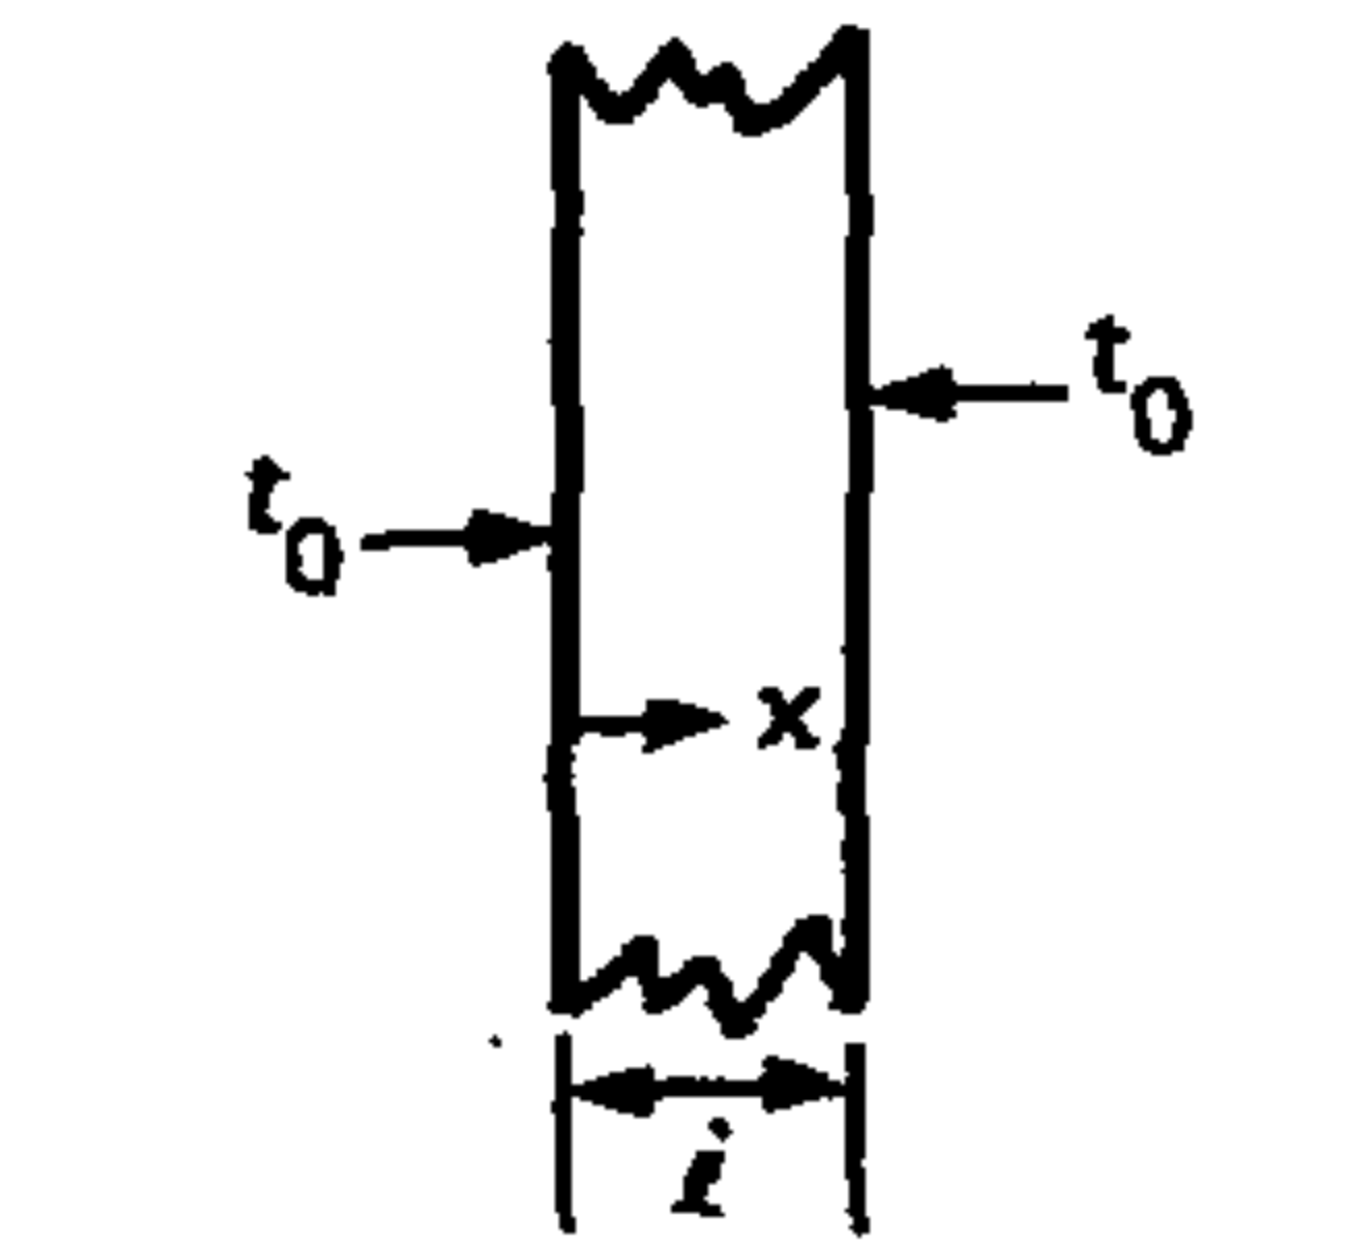

In [3]:
from IPython.display import Image
Image(filename='8.1.png',width=600,height=600)

Energy conservation equation:

$$\frac{\partial T}{\partial t}+v_x\frac{\partial T}{\partial x}+v_y\frac{\partial T}{\partial y}+v_z\frac{\partial T}{\partial z}=\alpha[\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}+\frac{\partial^2 T}{\partial z^2}+\frac{H_v}{\rho \hat {C_p}}]$$

No velocity and no heat generation, so we can remove zero terms:

$$\frac{\partial T}{\partial t}=\alpha \frac{\partial^2 T}{\partial x^2},\alpha=\frac{k}{\rho \hat{C_p}}$$

Initial conditions and boundary conditions:

$$T(x,t=0)=f(x),0<x<l$$

$$T(x=0,t)=t_0$$

$$T(x=l,t)=t_0$$

The problem here is that separation of variables will no longer work on this problem because the boundary conditions are no longer homogeneous. So, we need to convert the boundary conditions to homogeneous at first.

When $t\rightarrow{\infty}$ :

$$\lim_{t\rightarrow{\infty}}T(x,t)=T_E(x)$$

$T_E(x)$ is equilibrium temperature, and it should satisfy:

$$\frac{{\partial}^2T_E}{\partial x^2}=0, T_E(0)=t_0,T_E(l)=t_0$$

$$T_E(x)=C_1x+C_2$$

Applying $T_E(0)=t_0,T_E(l)=t_0$ gives:

$$C_1=0,C_2=t_0$$

So, $T_E(x)=t_0$

Define the function:

$$P(x,t)=T(x,t)-T_E(x)$$

Rewrite the function:

$$T(x,t)=P(x,t)+T_E(x)$$

So,

$$\frac{\partial T}{\partial t}=\frac{\partial P}{\partial t}+\frac{\partial T_E}{\partial t}=\frac{\partial P}{\partial t}$$

$$\frac{\partial^2 T}{\partial x^2}=\frac{\partial^2 P}{\partial x^2}+\frac{\partial^2 T_E}{\partial x^2}=\frac{\partial^2 P}{\partial x^2}$$

Rewrite the conversation equation:

$$\frac{\partial P}{\partial t}=\alpha \frac{\partial^2 P}{\partial x^2},\alpha=\frac{k}{\rho \hat{C_p}}$$

Initial conditions and boundary conditions for P(x,t):

$$P(x,t=0)=T(x,t=0)-T_E(x)=f(x)-t_0$$

$$P(x=0,t)=T(x=0,t)-T_E(0)=t_0-t_0=0$$

$$P(x=l,t)=T(x=l,t)-T_E(l)=t_0-t_0=0$$

The boundary conditions are homogeneous, so we can use separation of variables.

Assume that:

$$P(x,t)=\Phi(x)G(t)$$

So,

$$\Phi\frac{dG}{dt}=\alpha G\frac{d^2 \Phi}{dx^2}$$

$$\frac{1}{\alpha G(t)}=\frac{1}{\Phi(x)}\frac{d^2\Phi}{dx^2}$$

Assume$$\frac{1}{\alpha G(t)}=\frac{1}{\Phi(x)}\frac{d^2\Phi}{dx^2}=-\lambda$$

$\lambda$ is a positive constant.

Left-hand of the equation:

$$\frac{dG}{dt}=-\alpha \lambda G(t)$$

Use the boundary conditions:

$$P(0,t)=\Phi(0)G(t)=0,P(l,t)=\Phi(l)G(t)=0$$

$$\Phi(0)=0,\Phi(l)=0$$

Right-hand of the equation:

$$\frac{d^2\Phi}{dx^2}+\lambda{\Phi(x)}=0,\Phi(0)=0,\Phi(l)=0$$

$$\Phi(x)=C_3cos(\sqrt{\lambda} x)+C_4sin(\sqrt{\lambda} x)$$

Plug $\Phi(0)=0,\Phi(l)=0$:

$$\lambda_n(x)=(\frac{n\pi}{l})^2,\Phi_n(x)=sin(\frac{n\pi x}{l}),n=1,2,3,...$$

Plug $\lambda_n(x)=(\frac{n\pi}{l})^2$:

$$G(t)=B_n e^{-\alpha(\frac{n\pi}{l})^2t},n=1,2,3,...$$

$$B_n=\frac{2}{l}\int_{0}^{l}f(x)sin(\frac{n\pi x}{l})dx, n=1,2,3,...$$

So, 

$$P_n(x,t)=\sum_{n=1}^{\infty}B_n sin(\frac{n\pi x}{l}) e^{-\alpha(\frac{n\pi}{l})^2t},n=1,2,3,...$$

$$T(x,t)=T_E(x)+P(x,t)=t_0+\sum_{n=1}^{\infty}B_n sin(\frac{n\pi x}{l}) e^{-\alpha(\frac{n\pi}{l})^2t}$$

The solution is:

$$T-t_0=\sum_{n=1}^{\infty}B_nsin(\frac{n\pi x}{l})exp(-n^2\pi^2F_0),F_0=\frac{\alpha t}{l^2},n=1,2,3,...$$

$$B_n=\frac{2}{l}\int_{0}^{l}f(x)sin(\frac{n\pi x}{l})dx,n=1,2,3,...$$

f(x) is known, so I plug 20 (constant), $cos(\frac{n\pi x}{l})$ and $x$ respectively and plot them.

Case 1:
$f(x)=20$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [54]:
d = 101
x = np.linspace(0, 1, d)
t = np.linspace(0, 1, d)
u = np.zeros((x.shape[0], t.shape[0]))

In [85]:
n = 1
L = 1
k = 0.3
xv, tv = np.meshgrid(x, t)
t0=10

# Initial values
B = (40/(n*np.pi))*(1-(-1)**n)
u = B * np.sin(n*np.pi*xv/L)*np.exp(-k*tv*(n*np.pi/L)**2)+t0

for ni in range(2, 1000):
    B = (40/(ni*np.pi))*(1-(-1)**ni)
    u += B * np.sin(ni*np.pi*xv/L)*np.exp(-k*tv*(ni*np.pi/L)**2)

(0, 30)

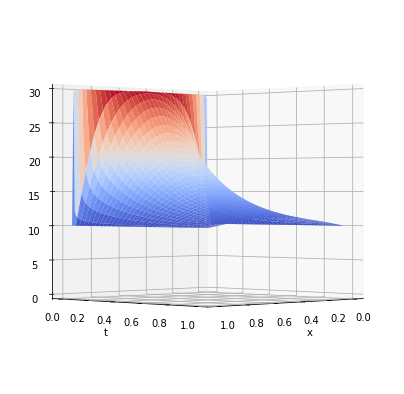

In [86]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=0, azim=45)
ax.set_zlim(0, 30)

Text(0, 0.5, 'T')

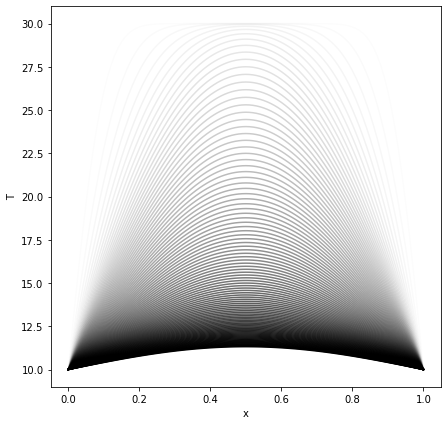

In [65]:
fig, ax = plt.subplots(figsize=(7,7))

for i in range(0, d):
    ax.plot(xv[i, :], u[i, :], c='k', alpha=i/d)
ax.set_xlabel('x')
ax.set_ylabel('T')

Text(0, 0.5, 'T')

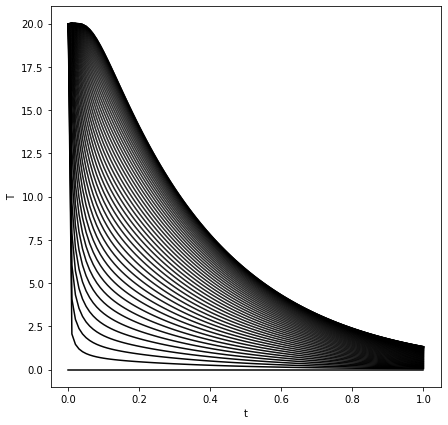

In [67]:
fig, ax = plt.subplots(figsize=(7,7))

for i in range(0,d):
    ax.plot(tv[:, i], T[:, i], c='k', alpha=(1 - (i/d)))
ax.set_xlabel('t')
ax.set_ylabel('T')

Case 2:
$f(x)=cos(\frac{n\pi x}{l})$

In [87]:
n = 1
L = 1
k = 0.3
xv, tv = np.meshgrid(x, t)
t0=10

# Initial values
B = 1
u = B * np.sin(n*np.pi*xv/L)*np.exp(-k*tv*(n*np.pi/L)**2)+t0

for ni in range(2, 1000):
    B = 1
    u += B * np.sin(ni*np.pi*xv/L)*np.exp(-k*tv*(ni*np.pi/L)**2)

(8, 15)

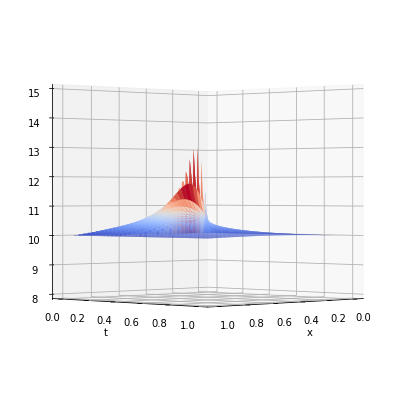

In [88]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=0, azim=45)
ax.set_zlim(8, 15)

Case 3:
$f(x)=x$

In [89]:
n = 1
L = 1
k = 0.3
xv, tv = np.meshgrid(x, t)
t0=10

# Initial values
B = -2*L*(-1)**n/(n*np.pi)
u = B * np.sin(n*np.pi*xv/L)*np.exp(-k*tv*(n*np.pi/L)**2)+t0

for ni in range(2, 1000):
    B = -2*L*(-1)**n/(n*np.pi)
    u += B * np.sin(ni*np.pi*xv/L)*np.exp(-k*tv*(ni*np.pi/L)**2)

(9, 13)

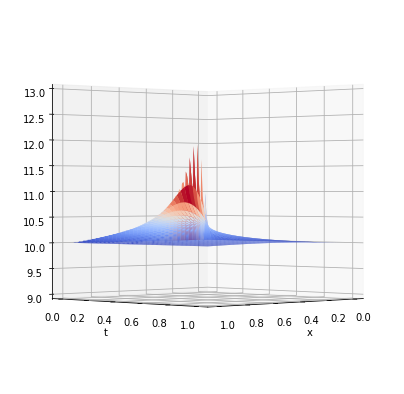

In [90]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=0, azim=45)
ax.set_zlim(9, 13)